In [1]:
# 1. Setup Environment
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [2]:
!pip install roboflow
import os
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 2. LOAD DATASET
# ------------------------------
print("\n📦 Loading dataset from Roboflow...")
rf = Roboflow(api_key="Replace With Your API Key")  # Replace with your key
project = rf.workspace("accident-detection-model").project("accident-detection-model")
dataset = project.version(2).download("yolov8")


# Verify dataset
print("\n🔍 Dataset verification:")
print(f"Location: {dataset.location}")
print("\nSample training images:")
!ls {dataset.location}/train/images | head -3


📦 Loading dataset from Roboflow...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-detection-model-2 in yolov8:: 100%|██████████| 6512/6512 [00:01<00:00, 6011.44it/s]



🔍 Dataset verification:
Location: /content/Accident-detection-model-2

Sample training images:
5_10_jpg.rf.5639f7a69885c595fc4b54e55dbf5148.jpg
5_11_jpg.rf.99ee6f27d5d5f353e00506003993302a.jpg
5_12_jpg.rf.f46713998d4579eabe3baf01d0bc605c.jpg


In [4]:
# 3. MODEL TRAINING WITH IMPROVEMENTS
# ------------------------------
print("\n⚙️ Configuring model training...")
model = YOLO('yolov8s.pt')  # Using small model (best balance)


⚙️ Configuring model training...


100%|██████████| 21.5M/21.5M [00:00<00:00, 321MB/s]


In [5]:
# Enhanced training configuration
results = model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=25,                # Increased epochs
    patience=15,              # Early stopping patience
    batch=16,
    imgsz=640,
    device=0,                 # GPU

    # Precision improvements
    conf=0.4,                 # Higher confidence threshold
    iou=0.6,                  # Stricter IoU

    # Recall improvements
    augment=True,             # Enable augmentations
    fliplr=0.5,               # Horizontal flips
    degrees=10.0,             # Rotation

    # mAP improvements
    mixup=0.1,                # Mixup augmentation
    copy_paste=0.1,           # Object duplication

    # Monitoring
    name='accident_v4_improved',
    save=True,
    save_period=5,
    plots=True
)

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Accident-detection-model-2/data.yaml, epochs=25, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=None, name=accident_v4_improved, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.4, iou=0.6, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

100%|██████████| 755k/755k [00:00<00:00, 101MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 241MB/s]


AMP: checks passed ✅


train: Scanning /content/Accident-detection-model-2/train/labels... 2517 images, 1196 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:00<00:00, 3020.37it/s]


train: New cache created: /content/Accident-detection-model-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Accident-detection-model-2/valid/labels... 371 images, 127 backgrounds, 0 corrupt: 100%|██████████| 371/371 [00:00<00:00, 2021.73it/s]

val: New cache created: /content/Accident-detection-model-2/valid/labels.cache


Plotting labels to runs/detect/accident_v4_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/accident_v4_improved
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.79G      2.004      3.729      2.113          9        640: 100%|██████████| 158/158 [00:52<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]

                   all        371        288      0.182    0.00694     0.0917     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      4.58G      2.059      2.585      2.163          7        640: 100%|██████████| 158/158 [00:49<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]

                   all        371        288     0.0678     0.0417     0.0364     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.62G       2.05      2.524      2.207          5        640: 100%|██████████| 158/158 [00:48<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]

                   all        371        288      0.842     0.0556      0.447       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.67G      2.015      2.466      2.161         10        640: 100%|██████████| 158/158 [00:53<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]

                   all        371        288      0.375      0.344      0.303      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.69G      1.955      2.375      2.097          2        640: 100%|██████████| 158/158 [00:49<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]

                   all        371        288      0.667      0.236      0.455      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.74G      1.926      2.234       2.05          5        640: 100%|██████████| 158/158 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]

                   all        371        288      0.766       0.25       0.51      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.76G      1.887      2.107       2.02          4        640: 100%|██████████| 158/158 [00:48<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        371        288      0.906      0.167      0.542      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.81G      1.817      2.032      1.986          4        640: 100%|██████████| 158/158 [00:48<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]

                   all        371        288      0.655      0.462      0.575      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.83G        1.8      1.982      1.979          4        640: 100%|██████████| 158/158 [00:48<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]

                   all        371        288      0.862      0.368       0.62      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.88G      1.808      1.944      1.959          3        640: 100%|██████████| 158/158 [00:48<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]

                   all        371        288      0.776       0.41      0.589      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.91G      1.771      1.915      1.931          4        640: 100%|██████████| 158/158 [00:48<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]

                   all        371        288      0.835      0.403      0.624      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.96G      1.739      1.766      1.892          9        640: 100%|██████████| 158/158 [00:48<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]

                   all        371        288      0.831      0.427      0.632      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.98G       1.73      1.736      1.879          5        640: 100%|██████████| 158/158 [00:47<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]

                   all        371        288        0.8        0.5       0.65      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.03G      1.713      1.725      1.879          6        640: 100%|██████████| 158/158 [00:48<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]

                   all        371        288      0.849      0.587      0.713      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.05G      1.662      1.659      1.844          6        640: 100%|██████████| 158/158 [00:47<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]

                   all        371        288      0.869      0.576      0.725      0.342


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25       5.1G       1.64       1.34      1.917          2        640: 100%|██████████| 158/158 [00:46<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]

                   all        371        288      0.837      0.483      0.668      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.12G      1.591      1.223      1.912          2        640: 100%|██████████| 158/158 [00:45<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        371        288      0.807      0.538      0.646        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.18G      1.576      1.203      1.881          4        640: 100%|██████████| 158/158 [00:45<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]

                   all        371        288      0.804      0.556      0.686      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25       5.2G      1.595      1.137      1.878          4        640: 100%|██████████| 158/158 [00:45<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        371        288      0.745      0.639      0.727      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.25G      1.544      1.075      1.834          3        640: 100%|██████████| 158/158 [00:46<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]

                   all        371        288      0.804      0.556      0.681      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.27G      1.526      1.011      1.829          1        640: 100%|██████████| 158/158 [00:45<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        371        288      0.819      0.628      0.686       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.32G      1.506      1.004       1.81          2        640: 100%|██████████| 158/158 [00:45<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]

                   all        371        288      0.797      0.653      0.744      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.34G      1.493     0.9509      1.787          1        640: 100%|██████████| 158/158 [00:45<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]

                   all        371        288      0.803      0.649      0.718      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.39G      1.462     0.9459      1.775          3        640: 100%|██████████| 158/158 [00:45<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        371        288      0.795       0.66      0.739      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.42G      1.467     0.9163       1.79          1        640: 100%|██████████| 158/158 [00:45<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]

                   all        371        288      0.816      0.663       0.76      0.378



25 epochs completed in 0.359 hours.
Optimizer stripped from runs/detect/accident_v4_improved/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/accident_v4_improved/weights/best.pt, 22.5MB

Validating runs/detect/accident_v4_improved/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]


                   all        371        288      0.804      0.691       0.76       0.37
Speed: 0.4ms preprocess, 14.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/accident_v4_improved



📊 Evaluating model performance...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/Accident-detection-model-2/test/labels... 362 images, 186 backgrounds, 0 corrupt: 100%|██████████| 362/362 [00:00<00:00, 808.82it/s]

val: New cache created: /content/Accident-detection-model-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.39it/s]


                   all        362        204      0.793      0.838      0.839      0.403
Speed: 1.1ms preprocess, 21.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/accident_v4_improved2

🚗 MODEL PERFORMANCE REPORT 🚗
📍 Precision: 0.793 (Correct predictions)
📍 Recall: 0.838 (Accidents detected)
📍 mAP50: 0.839 (Detection quality)
📍 mAP50-95: 0.403 (Localization)


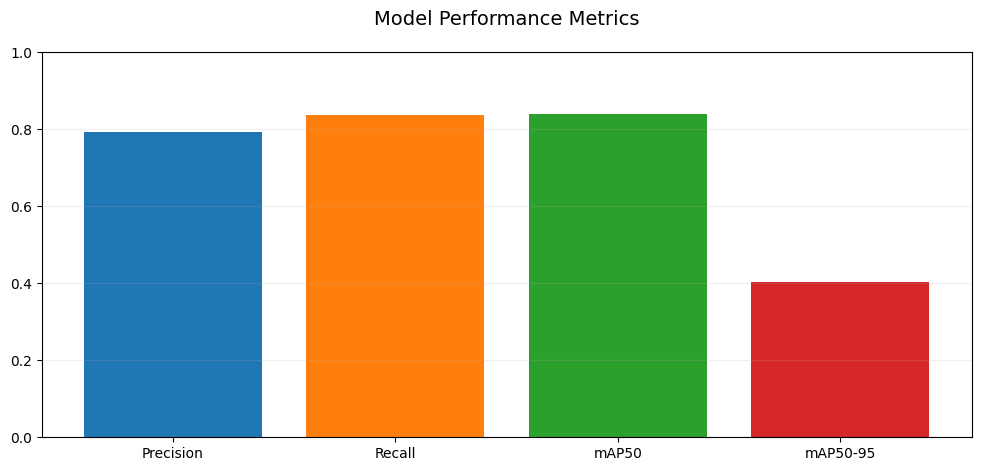

In [6]:
import numpy as np
# 4. VALIDATION & METRICS
# ------------------------------
print("\n📊 Evaluating model performance...")
metrics = model.val(
    data=f'{dataset.location}/data.yaml',
    split='test',
    conf=0.25,
    iou=0.50,
    plots=True
)

# Process metrics
def safe_metric(metric):
    return float(metric[0]) if isinstance(metric, np.ndarray) else metric

metrics_dict = {
    'Precision': safe_metric(metrics.box.p),
    'Recall': safe_metric(metrics.box.r),
    'mAP50': safe_metric(metrics.box.map50),
    'mAP50-95': safe_metric(metrics.box.map)
}

# Display metrics
print("\n🚗 MODEL PERFORMANCE REPORT 🚗")
print(f"📍 Precision: {metrics_dict['Precision']:.3f} (Correct predictions)")
print(f"📍 Recall: {metrics_dict['Recall']:.3f} (Accidents detected)")
print(f"📍 mAP50: {metrics_dict['mAP50']:.3f} (Detection quality)")
print(f"📍 mAP50-95: {metrics_dict['mAP50-95']:.3f} (Localization)")

# Visualization
plt.figure(figsize=(12, 5))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Model Performance Metrics', pad=20, fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.2)
plt.show()


In [7]:
# 5. PREDICTION PIPELINE (CORRECTED)
# ------------------------------
from PIL import Image  # Add this import at the top of your notebook
import cv2

def predict_accident(source, conf=0.25):
    """
    Enhanced prediction function with visualization
    Args:
        source: Path to image/video or numpy array
        conf: Confidence threshold (0-1)
    Returns:
        Annotated image and detection status
    """
    results = model.predict(source, conf=conf)

    for r in results:
        if len(r.boxes) > 0:
            print(f"🚨 ACCIDENT DETECTED (Confidence: {max(r.boxes.conf).item():.2f})")
            # Convert BGR to RGB and return PIL Image
            return Image.fromarray(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
        else:
            print("✅ NO ACCIDENT DETECTED")
            return Image.fromarray(cv2.cvtColor(r.orig_img, cv2.COLOR_BGR2RGB))

# Example usage
test_img = "/content/drive/MyDrive/Examples/No2.jpeg"
result_img = predict_accident(test_img)
result_img.show()  # Display using PIL

FileNotFoundError: /content/drive/MyDrive/Examples/No2.jpeg does not exist

In [10]:
# %% [markdown]
# ## 6. Deployment Preparation (Fixed Version)

# %%
print("\n🛠️ Preparing for deployment...")

# Export to ONNX
model.export(format='onnx')
export_path = os.path.normpath("runs/detect/accident_v4_improved/weights/best.onnx")
print(f"✅ Model exported to: {export_path}")

# Save to Google Drive (with proper encoding handling)
try:
    from google.colab import drive
    import locale

    # Force UTF-8 encoding
    locale.getpreferredencoding = lambda: 'UTF-8'

    print("\n⏳ Mounting Google Drive...")
    drive.mount('/content/drive')

    # Create target directory if it doesn't exist
    target_dir = '/content/drive/MyDrive/Accident_Detection_Results'
    !mkdir -p "{target_dir}"

    # Copy using shutil (more reliable than shell commands)
    import shutil
    shutil.copytree('runs', os.path.join(target_dir, 'runs'), dirs_exist_ok=True)

    print(f"\n📁 Results saved to: {target_dir}")
    print("✅ Deployment files successfully copied to Google Drive!")

except Exception as e:
    print(f"\n⚠️ Google Drive save failed: {str(e)}")
    print("The model has been exported locally to:")
    print(f"- {export_path}")
    print("You can manually download these files from the Colab file browser")


🛠️ Preparing for deployment...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/accident_v4_improved/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.8s, saved as 'runs/detect/accident_v4_improved/weights/best.onnx' (42.7 MB)

Export complete (3.4s)
Results saved to /content/runs/detect/accident_v4_improved/weights
Predict:         yolo predict task=detect model=runs/detect/accident_v4_improved/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/accident_v4_improved/weights/best.onnx imgsz=640 data=/content/Accident-detection-model-2/data.yaml  
Visualize:       https://netron.app
✅ Model exported to: runs/detect/accident_v4_improved/weights/best.onnx

⏳ Mounting Google Drive...
Drive already mounted at /content/drive; to 